In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class DynamicWeightAveraging:
    def __init__(self, num_losses, T=2.0):
        self.T = T
        self.num_losses = num_losses
        self.loss_history = [None, None]

    def update_weights(self):
        if self.loss_history[-1] is None or self.loss_history[-2] is None:
            return [1.0 for _ in range(self.num_losses)]

        loss_ratios = []
        for i in range(self.num_losses):
            ratio = self.loss_history[-1][i] / (self.loss_history[-2][i] + 1e-8)
            loss_ratios.append(ratio)

        loss_ratios = np.array(loss_ratios)
        exp_ratios = np.exp(loss_ratios / self.T)
        weights = self.num_losses * exp_ratios / np.sum(exp_ratios)
        return weights.tolist()

    def step(self, current_losses):
        self.loss_history[-2] = self.loss_history[-1]
        self.loss_history[-1] = current_losses

Epoch 1: Losses = [1. 1. 1. 1.], Weights = [1. 1. 1. 1.], Sum = 4.0
Epoch 2: Losses = [0.92 0.9  1.1  1.08], Weights = [1. 1. 1. 1.], Sum = 4.0
Epoch 3: Losses = [0.84 0.8  1.2  1.16], Weights = [0.96 0.95 1.05 1.04], Sum = 3.9999999999999996
Epoch 4: Losses = [0.76 0.7  1.3  1.24], Weights = [0.96  0.949 1.05  1.041], Sum = 3.9999999999999996
Epoch 5: Losses = [0.68 0.6  1.4  1.32], Weights = [0.961 0.946 1.05  1.043], Sum = 4.0
Epoch 6: Losses = [0.6 0.5 1.5 1.4], Weights = [0.96  0.942 1.052 1.045], Sum = 3.9999999999999996
Epoch 7: Losses = [0.52 0.6  1.4  1.48], Weights = [0.96  0.936 1.055 1.049], Sum = 4.0
Epoch 8: Losses = [0.44 0.7  1.3  1.56], Weights = [0.927 1.095 0.958 1.02 ], Sum = 4.0
Epoch 9: Losses = [0.36 0.8  1.2  1.64], Weights = [0.925 1.085 0.964 1.026], Sum = 4.000000000000001
Epoch 10: Losses = [0.28 0.9  1.1  1.72], Weights = [0.919 1.081 0.968 1.032], Sum = 4.0


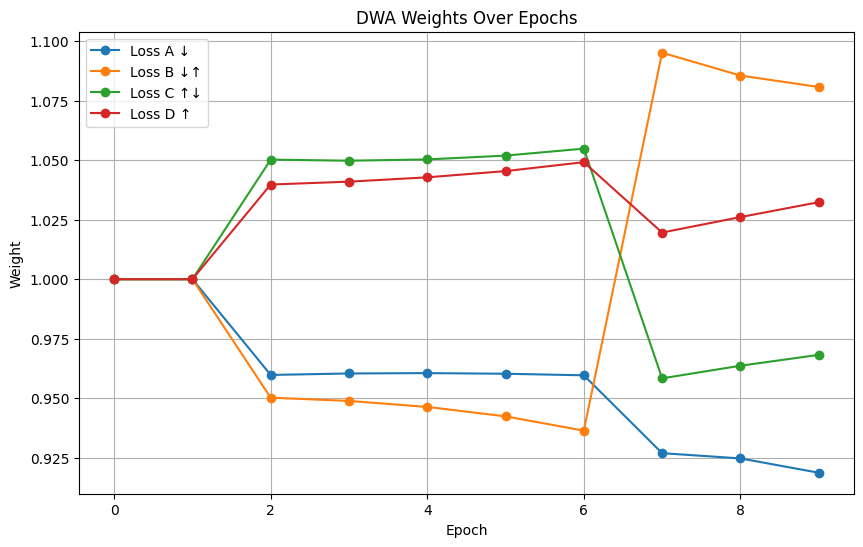

In [21]:
# Simulated losses over 10 epochs
epochs = 10
losses_A = [1.0 - 0.08 * i for i in range(epochs)]             # Decreasing
losses_B = [1.0 - 0.1 * i if i < 5 else 0.5 + 0.1 * (i - 5) for i in range(epochs)]  # Decrease then increase
losses_C = [1.0 + 0.1 * i if i < 5 else 1.5 - 0.1 * (i - 5) for i in range(epochs)]  # Increase then decrease
losses_D = [1.0 + 0.08 * i for i in range(epochs)]             # Increasing

# # Simulated losses over 100 epochs
# epochs = 100
# losses_A = [1.0 - 0.008 * i for i in range(epochs)]                      # Decreasing
# losses_B = [1.0 - 0.01 * i if i < 50 else 0.5 + 0.01 * (i - 50) for i in range(epochs)]  # Decrease then increase
# losses_C = [1.0 + 0.01 * i if i < 50 else 1.5 - 0.01 * (i - 50) for i in range(epochs)]  # Increase then decrease
# losses_D = [1.0 + 0.008 * i for i in range(epochs)]     

all_weights = []

# Initialize DWA
dwa = DynamicWeightAveraging(num_losses=4, T=2.0)

# Run epochs and update DWA
for epoch in range(epochs):
    current_losses = [losses_A[epoch], losses_B[epoch], losses_C[epoch], losses_D[epoch]]
    weights = dwa.update_weights()
    all_weights.append(weights)
    print(f"Epoch {epoch+1}: Losses = {np.round(current_losses, 3)}, Weights = {np.round(weights, 3)}, Sum = {sum(weights)}")
    dwa.step(current_losses)

# Plotting weights over time
all_weights = np.array(all_weights)
plt.figure(figsize=(10, 6))
for i, label in enumerate(['Loss A ↓', 'Loss B ↓↑', 'Loss C ↑↓', 'Loss D ↑']):
    plt.plot(all_weights[:, i], label=label, marker='o')
plt.title("DWA Weights Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.show()